In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Information on passenger activity for airports and airlines
passengers = pd.read_csv('T3_AIR_CARRIER_SUMMARY_AIRPORT_ACTIVITY_2019.csv')
passengers

,OP_UNIQUE_CARRIER,CARRIER_NAME,ORIGIN_AIRPORT_ID,SERVICE_CLASS,REV_ACRFT_DEP_PERF_510,REV_PAX_ENP_110
0,04Q,Tradewind Aviation,15024,K,10.0,39.0
1,04Q,Tradewind Aviation,14843,K,677.0,3649.0
2,04Q,Tradewind Aviation,10257,V,4.0,6.0
3,04Q,Tradewind Aviation,15323,V,1.0,3.0
4,04Q,Tradewind Aviation,10158,V,1.0,2.0
...,...,...,...,...,...,...
27247,ZW,Air Wisconsin Airlines Corp,11637,K,122.0,4535.0
27248,ZW,Air Wisconsin Airlines Corp,11721,K,143.0,5800.0
27249,ZW,Air Wisconsin Airlines Corp,10469,K,248.0,8901.0
27250,ZW,Air Wisconsin Airlines Corp,12884,K,187.0,7923.0


In [3]:
# Manufacture year and passenger capacity for aircraft by unique aircraft tail number
aircraft = pd.read_csv("B43_AIRCRAFT_INVENTORY.csv",encoding='latin1')
aircraft.drop_duplicates(subset='TAIL_NUM', inplace=True)
aircraft

,MANUFACTURE_YEAR,TAIL_NUM,NUMBER_OF_SEATS
0,1944,N54514,0.0
1,1945,N1651M,0.0
2,1953,N100CE,0.0
3,1953,N141FL,0.0
4,1953,N151FL,0.0
...,...,...,...
7378,2019,N14011,337.0
7379,2019,N16008,337.0
7380,2019,N16009,337.0
7381,2019,N2250U,276.0


In [4]:
# coordinates of airports
coords = pd.read_csv('AIRPORT_COORDINATES.csv')
coords.drop_duplicates(subset='ORIGIN_AIRPORT_ID', inplace=True)
coords

,ORIGIN_AIRPORT_ID,DISPLAY_AIRPORT_NAME,LATITUDE,LONGITUDE
0,10001,Afognak Lake Airport,58.109444,-152.906667
1,10003,Bear Creek Mining Strip,65.548056,-161.071667
2,10004,Lik Mining Camp,68.083333,-163.166667
3,10005,Little Squaw Airport,67.570000,-148.183889
4,10006,Kizhuyak Bay,57.745278,-152.882778
...,...,...,...,...
18128,16908,Deer Park Airport,47.966944,-117.428611
18129,16909,South Texas International at Edinburg,26.441667,-98.122222
18130,16910,Louisa County Freeman Field,38.009722,-77.970000
18131,16911,Caldwell Industrial,43.641944,-116.635833


In [5]:
# proper names of carriers for better EDA usage
names = pd.read_csv("CARRIER_DECODE.csv")
names.drop_duplicates(inplace=True)
names.drop_duplicates(subset=['OP_UNIQUE_CARRIER'], inplace=True)
names

,AIRLINE_ID,OP_UNIQUE_CARRIER,CARRIER_NAME
0,21754,2PQ,21 Air LLC
3,20342,Q5,40-Mile Air
4,20342,WRB,40-Mile Air
6,19627,CIQ,A/S Conair
7,19072,AAE,AAA Airlines
...,...,...,...
2702,20379,ZKQ,Zantop International
2706,19771,ZAQ,Zas Airline Of Egypt
2707,21118,37,Zeal 320
2708,22069,ZG,ZIPAIR Tokyo Inc.


In [6]:
# Weather report for top 90% of airport cities, in 2019
weather_report = pd.read_csv('airport_weather_2019.csv')
weather_report

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT08,WT09,WESD,WT10,PSUN,TSUN,SN32,SX32,TOBS,WT11
0,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,1/1/2019,4.70,NaN,0.14,0.0,0.0,64.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,1/2/2019,4.92,NaN,0.57,0.0,0.0,56.0,59.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,1/3/2019,5.37,NaN,0.15,0.0,0.0,52.0,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,1/4/2019,12.08,NaN,1.44,0.0,0.0,56.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,1/5/2019,13.42,NaN,0.00,0.0,0.0,49.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38670,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2019-12-27,6.04,NaN,0.00,NaN,NaN,68.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38671,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2019-12-28,5.37,NaN,0.06,NaN,NaN,69.0,74.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38672,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2019-12-29,7.61,NaN,0.10,NaN,NaN,70.0,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38673,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2019-12-30,5.82,NaN,0.02,NaN,NaN,68.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Our list of cities and airports including the airport display name so that we can connect with our main df
cities = pd.read_csv('airports_list.csv')
cities

,ORIGIN_AIRPORT_ID,DISPLAY_AIRPORT_NAME,ORIGIN_CITY_NAME,NAME
0,12992,Adams Field,"Little Rock, AR","NORTH LITTLE ROCK AIRPORT, AR US"
1,10257,Albany International,"Albany, NY","ALBANY INTERNATIONAL AIRPORT, NY US"
2,10140,Albuquerque International Sunport,"Albuquerque, NM","ALBUQUERQUE INTERNATIONAL AIRPORT, NM US"
3,10299,Anchorage International,"Anchorage, AK","ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT, A..."
4,10397,Atlanta Municipal,"Atlanta, GA",ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...
...,...,...,...,...
92,15370,Tulsa International,"Tulsa, OK","OKLAHOMA CITY WILL ROGERS WORLD AIRPORT, OK US"
93,12264,Washington Dulles International,"Washington, DC","WASHINGTON DULLES INTERNATIONAL AIRPORT, VA US"
94,13851,Will Rogers World,"Oklahoma City, OK","OKLAHOMA CITY WILL ROGERS WORLD AIRPORT, OK US"
95,12191,William P Hobby,"Houston, TX","HOUSTON WILLIAM P HOBBY AIRPORT, TX US"


In [8]:
# Connect our weather report with the city names
weather_merge = pd.merge(cities, weather_report, how='left', on='NAME')
weather_merge.columns

Index(['ORIGIN_AIRPORT_ID', 'DISPLAY_AIRPORT_NAME', 'ORIGIN_CITY_NAME', 'NAME',
       'STATION', 'DATE', 'AWND', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TAVG',
       'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03',
       'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WESD', 'WT10', 'PSUN',
       'TSUN', 'SN32', 'SX32', 'TOBS', 'WT11'],
      dtype='object')

In [9]:
# Get just the important metrics from the weather report (date, precipitation, snow, temp, wind)
weather = weather_merge[['DATE', 'PRCP', 'SNOW', 'TAVG', 'AWND', 'ORIGIN_AIRPORT_ID']]

In [10]:
# Drop any rows where no weather was recorded
weather.drop(weather.loc[weather['ORIGIN_AIRPORT_ID'].isna()].index, axis=0, inplace=True)

In [11]:
weather.dropna(inplace=True)
weather

,DATE,PRCP,SNOW,TAVG,AWND,ORIGIN_AIRPORT_ID
365,2019-01-01,0.10,0.0,42.0,15.21,10257
366,2019-01-02,0.00,0.0,28.0,3.80,10257
367,2019-01-03,0.00,0.1,35.0,9.62,10257
368,2019-01-04,0.00,0.0,36.0,6.93,10257
369,2019-01-05,0.42,0.0,36.0,4.70,10257
...,...,...,...,...,...,...
35020,2019-12-27,0.00,0.0,32.0,5.82,10713
35021,2019-12-28,0.00,0.0,29.0,2.24,10713
35022,2019-12-29,0.04,0.1,31.0,6.26,10713
35023,2019-12-30,0.00,0.0,31.0,2.46,10713


In [12]:
weather.isna().sum()

DATE                 0
PRCP                 0
SNOW                 0
TAVG                 0
AWND                 0
ORIGIN_AIRPORT_ID    0
dtype: int64

In [13]:
# Cast data types to datetime so we can get the month and day of month to match up with main df
weather['DATE'] = pd.to_datetime(weather['DATE'])
weather['MONTH'] = pd.DatetimeIndex(weather['DATE']).month
weather['DAY_OF_MONTH'] = pd.DatetimeIndex(weather['DATE']).day
weather

,DATE,PRCP,SNOW,TAVG,AWND,ORIGIN_AIRPORT_ID,MONTH,DAY_OF_MONTH
365,2019-01-01,0.10,0.0,42.0,15.21,10257,1,1
366,2019-01-02,0.00,0.0,28.0,3.80,10257,1,2
367,2019-01-03,0.00,0.1,35.0,9.62,10257,1,3
368,2019-01-04,0.00,0.0,36.0,6.93,10257,1,4
369,2019-01-05,0.42,0.0,36.0,4.70,10257,1,5
...,...,...,...,...,...,...,...,...
35020,2019-12-27,0.00,0.0,32.0,5.82,10713,12,27
35021,2019-12-28,0.00,0.0,29.0,2.24,10713,12,28
35022,2019-12-29,0.04,0.1,31.0,6.26,10713,12,29
35023,2019-12-30,0.00,0.0,31.0,2.46,10713,12,30


In [14]:
def month_cleanup(monthly_data, aircraft, coords, names, weather):
    
    '''Function which performs features engineering, data merges and cleanup using one month of On-Time data 
    from Bureau of Transportation Services
    Parameters:
    monthly_data: month of on-time data as downloaded from BTS
    aircraft: Aircraft inventory data from BTS
    coords: Airport coordinates data from BTS
    names: Carrier names based on carrier code from BTS
    weather: Daily weather reported at airports from National Center for Environmental Information
    passengers: Yearly passenger information for carriers and airports from BTS
    employees: Employee statistics for carriers from BTS
    
    returns: cleaned month of On-Time reporting
    '''
    
    # CLEANING
    # drop rows with no departure time, tail number, or were cancelled
    print("Dropping NaNs from Dep Time, Tail Num. Dropping Cancellations.")
    monthly_data.drop(monthly_data.loc[monthly_data['DEP_TIME'].isna()].index, axis=0, inplace=True)
    monthly_data.drop(monthly_data.loc[monthly_data['TAIL_NUM'].isna()].index, axis=0, inplace=True)
    monthly_data.drop(monthly_data.loc[monthly_data['CANCELLED'].isna()].index, axis=0, inplace=True)
 
    # FEATURE ENGINEERING - SEGMENT NUMBER
    # List flight segment number for daily flight segments by tracking tail number
    print("Adding Flight Number Sequence - SEGMENT_NUMBER")
    monthly_data["SEGMENT_NUMBER"] = monthly_data.groupby(["TAIL_NUM", 'DAY_OF_MONTH'])["DEP_TIME"].rank("dense", ascending=True)
    
    # FEATURE ENGINEERING - CONCURRENT FLIGHTS
    # Listing the number of concurrent flights at the airport in the time block 
    print("Adding Concurrent Flights - CONCURRENT_FLIGHTS")
    monthly_data['CONCURRENT_FLIGHTS'] = monthly_data.groupby(['ORIGIN_AIRPORT_ID','DAY_OF_MONTH', 'DEP_TIME_BLK'])['OP_UNIQUE_CARRIER'].transform("count")
 
    # MERGING to get NUMBER_OF_SEATS
    print("Applying seat counts to flights - NUMBER_OF_SEATS")   
    # Merge aircraft info with main frame on tail number - get NUMBER_OF_SEATS 
    monthly_data = pd.merge(monthly_data, aircraft, how="left", on='TAIL_NUM')
    monthly_data['NUMBER_OF_SEATS'].dropna(inplace=True)

    # MERGING
    # Merge to get proper carrier name
    print("Applying Carrier Names - CARRIER_NAME")  
    monthly_data = pd.merge(monthly_data, names, how='left', on=['OP_UNIQUE_CARRIER'])
    
    # FEATURE ENGINEERING - AIRPORT_FLIGHTS_MONTH, AIRLINE_FLIGHTS_MONTH, AIRLINE_AIRPORT_FLIGHTS_MONTH
    # Add monthly flight statistics for carrier and airport
    print("Adding flight statistics for carrier and airport - AIRPORT_FLIGHTS_MONTH, AIRLINE_FLIGHTS_MONTH, AIRLINE_AIRPORT_FLIGHTS_MONTH")
    monthly_data['AIRPORT_FLIGHTS_MONTH'] = monthly_data.groupby(['ORIGIN_AIRPORT_ID'])['ORIGIN_CITY_NAME'].transform('count')
    
    # FEATURE ENGINEERING - PLANE AGE
    # Calculate age of plane
    print("Calculate Fleet Age - PLANE_AGE")
    monthly_data['MANUFACTURE_YEAR'].dropna(inplace=True)
    monthly_data['PLANE_AGE'] = 2019 - monthly_data['MANUFACTURE_YEAR']

    # MERGING
    # Merge to get airport coordinates
    print("Adding airport coordinates - LATITUDE, LONGITUDE, DEPARTING_AIRPORT")
    monthly_data = pd.merge(monthly_data, coords, how='left', on=['ORIGIN_AIRPORT_ID'])
    monthly_data['LATITUDE'] = round(monthly_data['LATITUDE'], 3)
    monthly_data['LONGITUDE'] = round(monthly_data['LONGITUDE'], 3)

    # FEATURE ENGINEERING - PREVIOUS AIRPORT
    # Get previous airport for tail number
    print("Adding airports - PREVIOUS_AIRPORT")
    segment_temp = monthly_data[['DAY_OF_MONTH', 'TAIL_NUM', 'DISPLAY_AIRPORT_NAME', 'SEGMENT_NUMBER']]
    monthly_data = pd.merge_asof(monthly_data.sort_values('SEGMENT_NUMBER'), segment_temp.sort_values('SEGMENT_NUMBER'), on='SEGMENT_NUMBER', by=['DAY_OF_MONTH', 'TAIL_NUM'], allow_exact_matches=False)
    monthly_data['DISPLAY_AIRPORT_NAME_y'].fillna('NONE', inplace=True)
    monthly_data.rename(columns={"DISPLAY_AIRPORT_NAME_y": "PREVIOUS_AIRPORT", "DISPLAY_AIRPORT_NAME_x": "DEPARTING_AIRPORT"}, inplace=True)  
    
    # CLEANING  
    # Drop airports below the 10th percentile
    print("Dropping bottom 10% of airports")
    monthly_data.drop(monthly_data.loc[monthly_data['AIRPORT_FLIGHTS_MONTH'] < 1100].index, axis=0, inplace=True)
    
    # MERGING
    # Merge weather data
    print("Adding daily weather data - PRCP, SNOW, TAVG, AWND")
    monthly_data = pd.merge(monthly_data, weather, how='inner', on=['ORIGIN_AIRPORT_ID', 'MONTH', 'DAY_OF_MONTH'])

    
    # CLEANING
    # drop columns that we won't use
    print("Clean up unneeded columns")
    monthly_data.drop(columns = ['ORIGIN',  'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME',
                                 'ARR_TIME', 'CANCELLATION_CODE', 'CRS_ELAPSED_TIME',
                                 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
                                 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'ARR_DELAY_NEW',
                                 'Unnamed: 32', 'ARR_TIME_BLK', 'ACTUAL_ELAPSED_TIME',
                                 'DEST_AIRPORT_ID', 'DEST_CITY_NAME',  'OP_CARRIER_FL_NUM',
                                 'OP_UNIQUE_CARRIER', 'AIRLINE_ID', 'DATE', 'DAY_OF_MONTH',
                                 'TAIL_NUM','DEP_TIME', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME',
                                 'MANUFACTURE_YEAR'
                                 ],
                    axis=1, inplace=True)
    
    # CLEANING
    # specify data types of various fields to reduce memory usage
    print("Cleaning up data types")
    monthly_data['MONTH'] = monthly_data['MONTH'].astype('object')
    monthly_data['DAY_OF_WEEK'] = monthly_data['DAY_OF_WEEK'].astype('object')
    monthly_data['DISTANCE_GROUP'] = monthly_data['DISTANCE_GROUP'].astype('int8')
    monthly_data['SEGMENT_NUMBER'] = monthly_data['SEGMENT_NUMBER'].astype('int8')
    monthly_data['AIRPORT_FLIGHTS_MONTH'] = monthly_data['AIRPORT_FLIGHTS_MONTH'].astype('int64')
    
    monthly_data.reset_index(inplace=True, drop=True)
    
    print("FINISHED")
    
    return monthly_data

In [15]:
# processing all files
files = ['ONTIME_REPORTING_01.csv', 'ONTIME_REPORTING_02.csv', 'ONTIME_REPORTING_03.csv',
         'ONTIME_REPORTING_04.csv', 'ONTIME_REPORTING_05.csv', 'ONTIME_REPORTING_06.csv',
         'ONTIME_REPORTING_07.csv', 'ONTIME_REPORTING_08.csv', 'ONTIME_REPORTING_09.csv',
         'ONTIME_REPORTING_10.csv', 'ONTIME_REPORTING_11.csv', 'ONTIME_REPORTING_12.csv']

month_df_list = []

for file in files:
    df = pd.read_csv(file)
    curr_month = month_cleanup(df, aircraft, coords, names, weather)
    month_df_list.append(curr_month)
    print("Processing done for file", file)
    print("\n")

Dropping NaNs from Dep Time, Tail Num. Dropping Cancellations.
Adding Flight Number Sequence - SEGMENT_NUMBER
Adding Concurrent Flights - CONCURRENT_FLIGHTS
Applying seat counts to flights - NUMBER_OF_SEATS
Applying Carrier Names - CARRIER_NAME
Adding flight statistics for carrier and airport - AIRPORT_FLIGHTS_MONTH, AIRLINE_FLIGHTS_MONTH, AIRLINE_AIRPORT_FLIGHTS_MONTH
Calculate Fleet Age - PLANE_AGE
Adding airport coordinates - LATITUDE, LONGITUDE, DEPARTING_AIRPORT
Adding airports - PREVIOUS_AIRPORT
Dropping bottom 10% of airports
Adding daily weather data - PRCP, SNOW, TAVG, AWND
Clean up unneeded columns
Cleaning up data types
FINISHED
Processing done for file ONTIME_REPORTING_01.csv


Dropping NaNs from Dep Time, Tail Num. Dropping Cancellations.
Adding Flight Number Sequence - SEGMENT_NUMBER
Adding Concurrent Flights - CONCURRENT_FLIGHTS
Applying seat counts to flights - NUMBER_OF_SEATS
Applying Carrier Names - CARRIER_NAME
Adding flight statistics for carrier and airport - AIRPO

In [16]:
# combining all processed dataframes to form bigger df
combined_df = pd.DataFrame()
for df in month_df_list:
    combined_df = pd.concat([combined_df, df], axis=0)

In [17]:
# assigning seasons
seasons = []
month = combined_df["MONTH"].to_list()

for num in range(len(combined_df.index)):
    if month[num] in [3, 4, 5]:
        seasons.append("Spring")
    elif month[num] in [6, 7, 8]:
        seasons.append("Summer")
    elif month[num] in [9, 10, 11]:
        seasons.append("Autumn")
    else:
        seasons.append("Winter")

combined_df["SEASON"] = seasons

In [18]:
# assigning time of week
time_of_week = []
day = combined_df["DAY_OF_WEEK"].to_list()

for num in range(len(combined_df.index)):
    if day[num] in [1, 2]:
        time_of_week.append("Start")
    elif day[num] in [3, 4]:
        time_of_week.append("Mid")
    else:
        time_of_week.append("Weekend")

combined_df["TIME_OF_WEEK"] = time_of_week 

In [19]:
# assinging time of day
combined_df["DEP_TIME_BLK"].unique()

early_morning = ["0001-0559"]
morning = ["0600-0659", "0700-0759", "0800-0859",
           "0900-0959", "1000-1059", "1100-1159"]
afternoon = ["1200-1259", "1300-1359", "1400-1459",
             "1500-1559", "1600-1659", "1700-1759"]
night = ["1800-1859", "1900-1959", "2000-2059",
         "2100-2159", "2200-2259", "2300-2359"]

time_of_day = []
block = combined_df["DEP_TIME_BLK"].to_list()

for num in range(len(combined_df.index)):
    if block[num] in early_morning:
        time_of_day.append("Early Morning")
    elif block[num] in morning:
        time_of_day.append("Morning")
    elif block[num] in afternoon:
        time_of_day.append("Afternoon")
    else:
        time_of_day.append("Night")

combined_df["TIME_OF_DAY"] = time_of_day

In [20]:
# encoding delay/cancellation categories
delay_cancellation_cat = []
cancelled = combined_df["CANCELLED"].to_list()
delay_durat = combined_df["DEP_DELAY_NEW"].to_list()

for num in range(len(combined_df.index)):
    if cancelled[num] == 1:
        delay_cancellation_cat.append(4)
    else:                
        if delay_durat[num] > 45:
            delay_cancellation_cat.append(3)
        elif delay_durat[num] > 15:
            delay_cancellation_cat.append(2)
        elif delay_durat[num] > 0:
            delay_cancellation_cat.append(1)
        else:
            delay_cancellation_cat.append(0)

combined_df["DELAY_CAT"] = delay_cancellation_cat

In [21]:
# dropping unused columns
combined_df.drop(["DEP_DEL15", "SEGMENT_NUMBER", "AIRPORT_FLIGHTS_MONTH", "LATITUDE", "LONGITUDE", "PREVIOUS_AIRPORT"], axis=1, inplace=True)

In [22]:
#drop rows with missing data
combined_df.dropna(inplace=True)

In [23]:
combined_df

,MONTH,DAY_OF_WEEK,DEP_DELAY_NEW,DEP_TIME_BLK,CANCELLED,DISTANCE_GROUP,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,PLANE_AGE,DEPARTING_AIRPORT,PRCP,SNOW,TAVG,AWND,SEASON,TIME_OF_WEEK,TIME_OF_DAY,DELAY_CAT
0,1,1,241.0,2100-2159,0.0,3,18,173.0,United Air Lines Inc.,5.0,Chicago O'Hare International,0.53,5.0,18.0,12.75,Winter,Start,Night,3
2,1,1,43.0,0700-0759,0.0,7,35,216.0,United Air Lines Inc.,16.0,Chicago O'Hare International,0.53,5.0,18.0,12.75,Winter,Start,Morning,2
3,1,1,20.0,1000-1059,0.0,4,36,216.0,United Air Lines Inc.,15.0,Chicago O'Hare International,0.53,5.0,18.0,12.75,Winter,Start,Morning,2
4,1,1,40.0,0700-0759,0.0,9,35,173.0,United Air Lines Inc.,6.0,Chicago O'Hare International,0.53,5.0,18.0,12.75,Winter,Start,Morning,2
5,1,1,0.0,0600-0659,0.0,8,23,173.0,United Air Lines Inc.,6.0,Chicago O'Hare International,0.53,5.0,18.0,12.75,Winter,Start,Morning,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342049,12,6,15.0,1800-1859,0.0,6,9,143.0,Southwest Airlines Co.,14.0,Chicago Midway International,0.00,0.0,33.0,9.40,Winter,Weekend,Night,1
342050,12,6,50.0,1600-1659,0.0,4,11,143.0,Southwest Airlines Co.,18.0,Chicago Midway International,0.00,0.0,33.0,9.40,Winter,Weekend,Afternoon,3
342051,12,6,0.0,1900-1959,0.0,4,16,143.0,Southwest Airlines Co.,19.0,Chicago Midway International,0.00,0.0,33.0,9.40,Winter,Weekend,Night,0
342052,12,6,18.0,2000-2059,0.0,2,5,143.0,Southwest Airlines Co.,19.0,Chicago Midway International,0.00,0.0,33.0,9.40,Winter,Weekend,Night,2


## EDA

In [24]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4005685 entries, 0 to 342053
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   MONTH               object 
 1   DAY_OF_WEEK         object 
 2   DEP_DELAY_NEW       float64
 3   DEP_TIME_BLK        object 
 4   CANCELLED           float64
 5   DISTANCE_GROUP      int8   
 6   CONCURRENT_FLIGHTS  int64  
 7   NUMBER_OF_SEATS     float64
 8   CARRIER_NAME        object 
 9   PLANE_AGE           float64
 10  DEPARTING_AIRPORT   object 
 11  PRCP                float64
 12  SNOW                float64
 13  TAVG                float64
 14  AWND                float64
 15  SEASON              object 
 16  TIME_OF_WEEK        object 
 17  TIME_OF_DAY         object 
 18  DELAY_CAT           int64  
dtypes: float64(8), int64(2), int8(1), object(8)
memory usage: 584.5+ MB


In [25]:
combined_df.isnull().sum() 

MONTH                 0
DAY_OF_WEEK           0
DEP_DELAY_NEW         0
DEP_TIME_BLK          0
CANCELLED             0
DISTANCE_GROUP        0
CONCURRENT_FLIGHTS    0
NUMBER_OF_SEATS       0
CARRIER_NAME          0
PLANE_AGE             0
DEPARTING_AIRPORT     0
PRCP                  0
SNOW                  0
TAVG                  0
AWND                  0
SEASON                0
TIME_OF_WEEK          0
TIME_OF_DAY           0
DELAY_CAT             0
dtype: int64

In [26]:
combined_df['DELAY_CAT'].value_counts()

0    2587281
1     680422
2     382246
3     352840
4       2896
Name: DELAY_CAT, dtype: int64

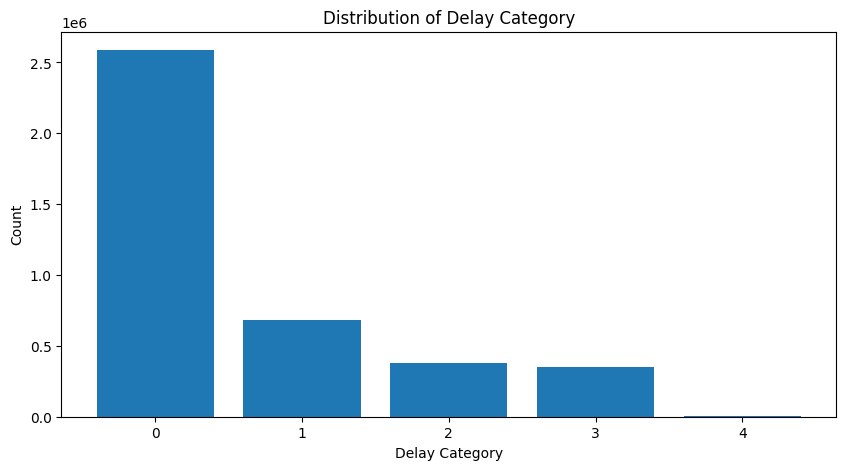

In [28]:
plt.figure(figsize=(10,5))
plt.bar(combined_df['DELAY_CAT'].value_counts().index, combined_df['DELAY_CAT'].value_counts().values)
plt.xlabel('Delay Category')
plt.ylabel('Count')
plt.title('Distribution of Delay Category')
plt.show()

In [29]:
combined_df['DEPARTING_AIRPORT'].value_counts()

Atlanta Municipal                 368562
Chicago O'Hare International      308296
Stapleton International           246416
Douglas Municipal                 229265
LaGuardia                         165326
                                   ...  
Honolulu International              4044
Portland International Jetport      3426
Spokane International               3413
Ontario International               1699
Long Beach Daugherty Field          1296
Name: DEPARTING_AIRPORT, Length: 63, dtype: int64

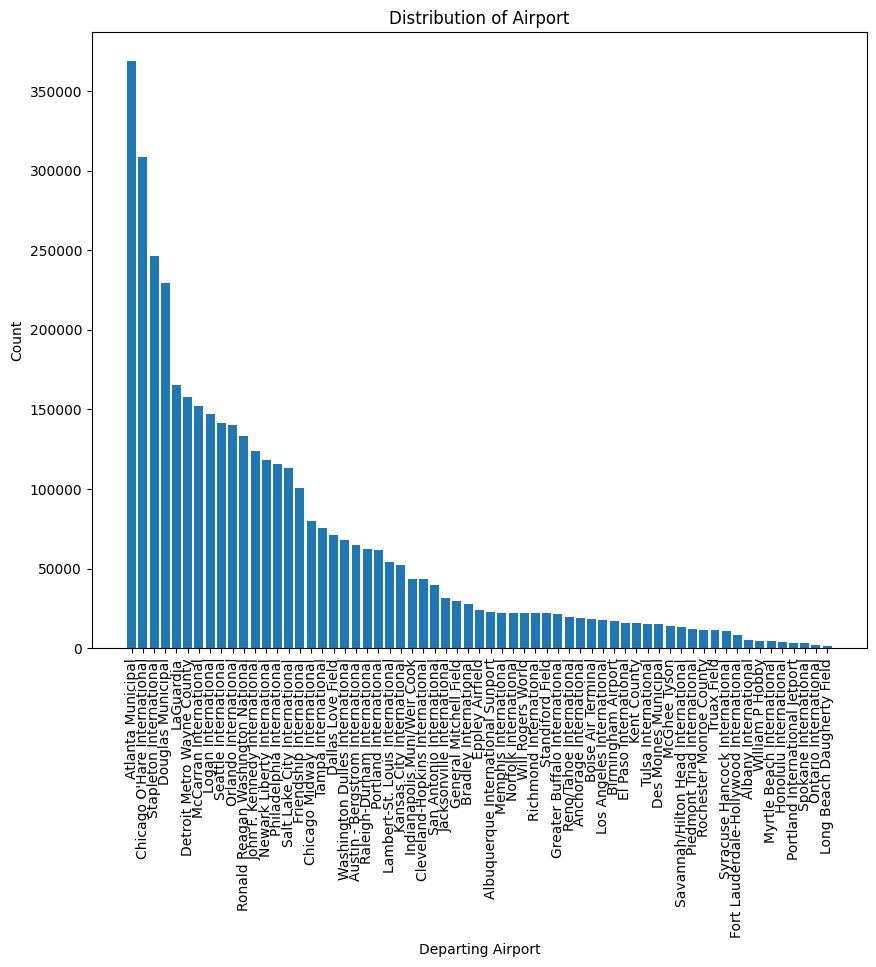

In [30]:
plt.figure(figsize=(10,8))
plt.bar(combined_df['DEPARTING_AIRPORT'].value_counts().index, combined_df['DEPARTING_AIRPORT'].value_counts().values)
plt.xlabel('Departing Airport')
plt.ylabel('Count')
plt.title('Distribution of Airport')
plt.xticks(rotation=90)
plt.show()

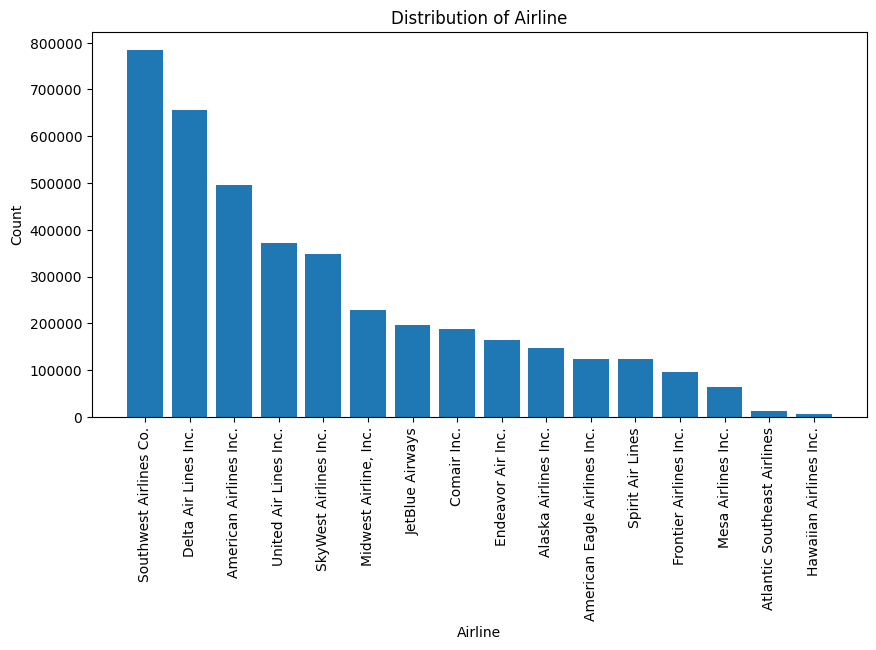

In [31]:
plt.figure(figsize=(10,5))
plt.bar(combined_df['CARRIER_NAME'].value_counts().index, combined_df['CARRIER_NAME'].value_counts().values)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Distribution of Airline')
plt.xticks(rotation=90)
plt.show()

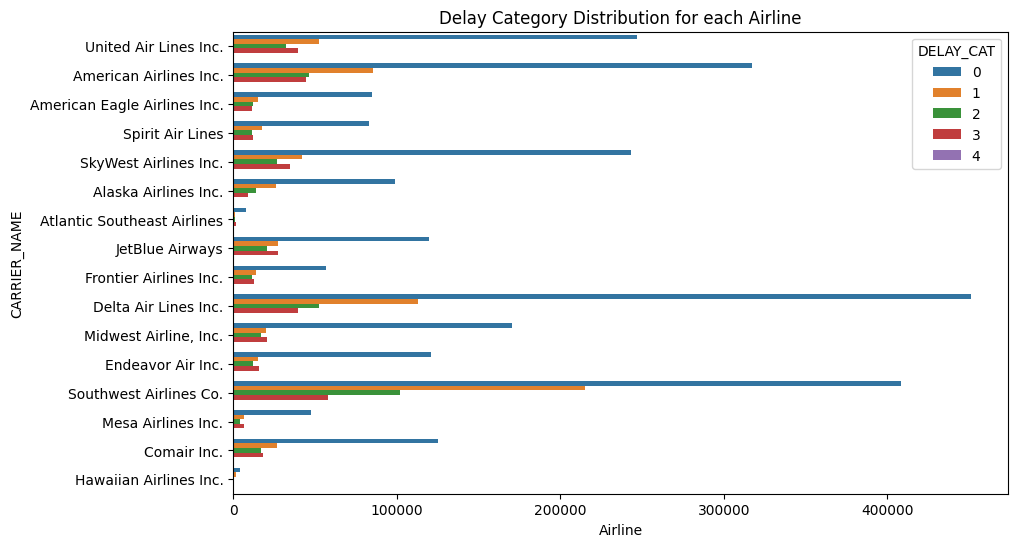

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(y=combined_df['CARRIER_NAME'], hue=combined_df['DELAY_CAT'])
plt.title('Delay Category Distribution for each Airline')
plt.xlabel('Airline')
plt.show()

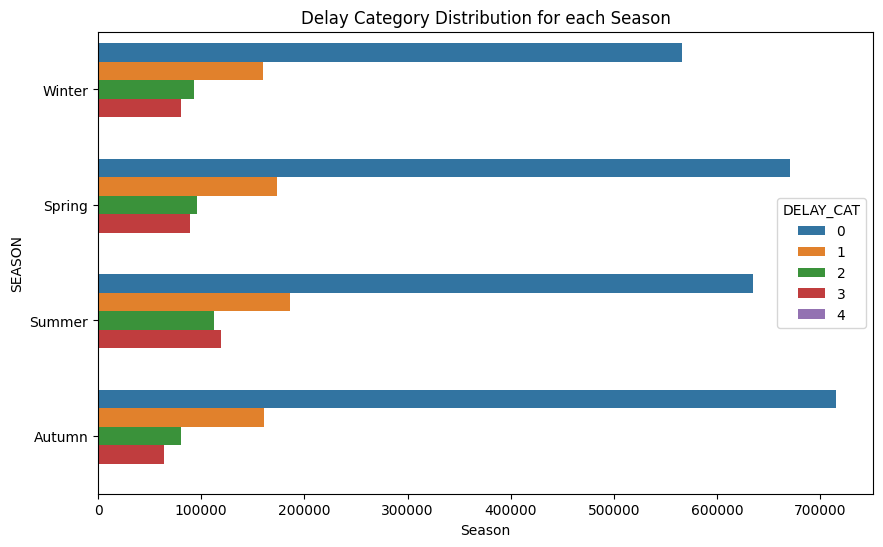

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(y=combined_df['SEASON'], hue=combined_df['DELAY_CAT'])
plt.title('Delay Category Distribution for each Season')
plt.xlabel('Season')
plt.show()

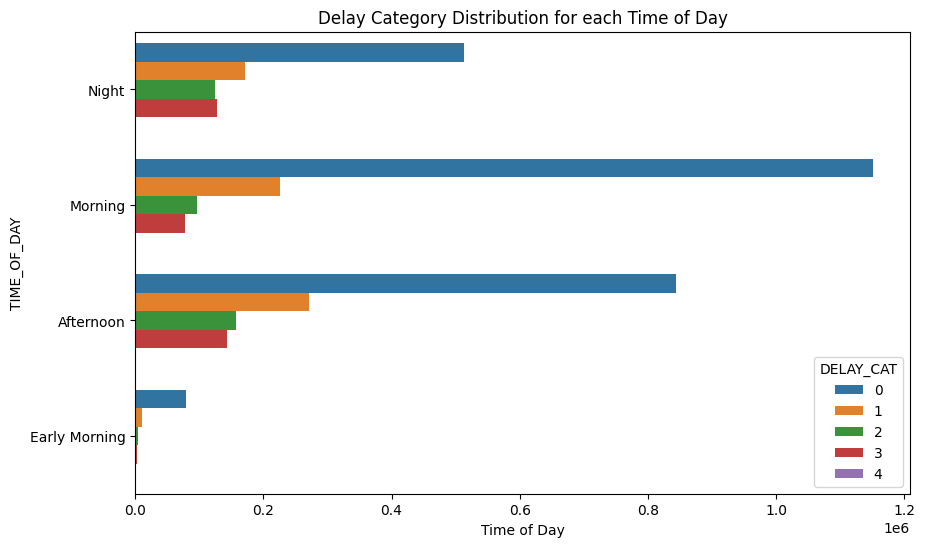

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(y=combined_df['TIME_OF_DAY'], hue=combined_df['DELAY_CAT'])
plt.title('Delay Category Distribution for each Time of Day')
plt.xlabel('Time of Day')
plt.show()

## Feature Selection

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectPercentile

In [36]:
X = combined_df.drop(columns=['MONTH', 'DAY_OF_WEEK', 'DEP_DELAY_NEW', 'CANCELLED', 'DEP_TIME_BLK', 'DELAY_CAT'], axis=1)
y = combined_df['DELAY_CAT']

#Split into train, test, validation sets
X_train, X_left, y_train, y_left = train_test_split(X, y, train_size=0.6, random_state=105)
X_valid, X_test, y_valid, y_test = train_test_split(X_left,y_left, test_size=0.5, random_state=105)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(2403411, 13)
(801137, 13)
(801137, 13)


In [37]:
enc = OneHotEncoder(categories='auto')
X_train_enc = enc.fit_transform(X_train[['CARRIER_NAME', 'DEPARTING_AIRPORT', 'SEASON', 'TIME_OF_WEEK', 'TIME_OF_DAY']])
X_train.drop(columns=['CARRIER_NAME', 'DEPARTING_AIRPORT', 'SEASON', 'TIME_OF_WEEK', 'TIME_OF_DAY'], axis=1, inplace=True)
x_train_final = np.hstack((X_train.values, X_train_enc.toarray()))

In [82]:
selector = SelectPercentile(mutual_info_classif, percentile=50).fit(x_train_final, y_train)
scores = selector.scores_
print(scores)

[2.12018589e-04 5.13597499e-05 2.17060683e-05 3.29058915e-04
 6.00625797e-04 1.53773842e-04 1.68408666e-03 1.21134178e-03
 3.76954539e-04 7.05919520e-05 8.52727031e-04 4.34091069e-04
 1.96501536e-03 1.13205939e-03 1.17516790e-02 9.84525291e-05
 4.70504208e-04 7.97411974e-06 3.35069555e-05 2.44312005e-04
 4.20487688e-04 2.24721518e-05 2.71832097e-05 1.38110311e-04
 5.35488253e-05 1.79391466e-03 4.97325090e-04 1.15215190e-04
 1.41683827e-03 9.39411626e-05 3.37041760e-04 4.96121811e-05
 2.42592957e-05 3.31496946e-05 1.29883940e-05 4.14210036e-04
 2.59638410e-05 4.35867393e-05 6.33379657e-05 7.30386759e-05
 7.67839308e-05 1.24842008e-04 6.08583905e-05 3.29401311e-05
 5.28258620e-04 4.28800600e-04 1.71977051e-04 1.33539183e-05
 1.68236111e-05 3.78948860e-04 1.11369817e-04 4.77836654e-05
 1.15522869e-05 6.47219358e-04 7.18739302e-05 4.81162112e-06
 1.13094170e-04 2.07600888e-04 7.63738356e-05 2.33671927e-04
 9.62480666e-06 4.05071277e-06 4.75918050e-05 8.41912038e-05
 4.08596446e-05 2.427573

In [39]:
selector = SelectPercentile(mutual_info_classif, percentile=50)
selector.fit(x_train_final, y_train)
x_new = selector.transform(x_train_final)
print(x_new)

KeyboardInterrupt: 

In [67]:
X_useful = SelectPercentile(mutual_info_classif, percentile=50).fit(X_train_enc, y_train)
X_useful

SelectPercentile(percentile=50,
                 score_func=<function mutual_info_classif at 0x7fc62501b9d0>)